# 誤差逆伝播法

[バックプロパゲーション,Backpropagation](https://ja.wikipedia.org/wiki/%E3%83%90%E3%83%83%E3%82%AF%E3%83%97%E3%83%AD%E3%83%91%E3%82%B2%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3)のこと。ニューロン単位で損失関数計算し「局所誤差」を求め、ニューロンに対する入力の内、より大きな重みで接続された前段のニューロンに対して、局所誤差の責任があると判定する。連鎖律により、層全体のニューロンに対する入力を集積させてその入力を呼び起こしたニューロンを特定し、重みの傾斜を再計算することで責任を逆伝播させる。

## 連鎖律

[連鎖律](https://ja.wikipedia.org/wiki/%E9%80%A3%E9%8E%96%E5%BE%8B)とは微分法において以下の性質が成り立つ式のこと。  合成関数の導関数の積が元の構成関数の導関数と等しくなる。 。
$ \frac{dz}{dx} = \frac{dz}{dt} \frac{dt}{dx} $

## 計算グラフに置ける誤差逆伝播

[誤差逆伝播法のための計算グラフまとめ](http://marumaru.tonkotsu.jp/%E8%AA%A4%E5%B7%AE%E9%80%86%E4%BC%9D%E6%92%AD%E6%B3%95%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E8%A8%88%E7%AE%97%E3%82%B0%E3%83%A9%E3%83%95%E3%81%BE%E3%81%A8%E3%82%81) より

### ドット積の逆伝播

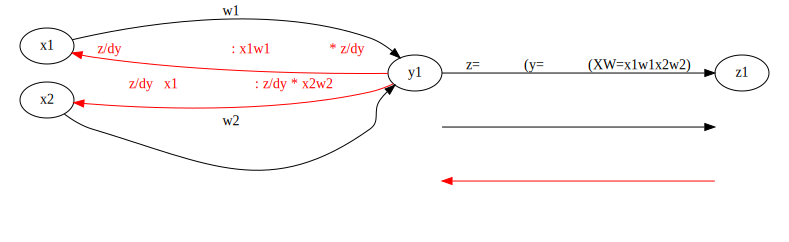

In [26]:
from graphviz import Digraph
dot = Digraph(comment="積の逆伝播")
dot.attr(rankdir="LR")
#dot.attr(splines="line") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="ドット積の逆伝播（単純に転置行列をしかるべき方向から掛け合わせて元の行列に戻すだけ）")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","x1")
        x.node("x2","x2")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y0","y0", color="white", fontcolor="white")
        y.node("y1","y1")
        y.node("y2","y2", color="white", fontcolor="white")
    dot.edge("x1", "y1", label="w1")
    dot.edge("x2",  "y1", label="w2")
    with main.subgraph(name="cluster_z") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z0","z0", color="white", fontcolor="white")
        z.node("z1","z1")
        z.node("z2","z2", color="white", fontcolor="white")
    main.edge("y0",  "z0", label="順伝播方向")
    main.edge("z2",  "y2", label="逆伝播方向", color="red", fontcolor="red")
    main.edge("y1",  "z1", label="z=活性関数(y=ドット積(XW=x1w1x2w2)")
    main.edge("y1",  "x1", label="z/dyにｘ２の重みを与える: x1w1の転置行列 * z/dy", color="red", fontcolor="red")
    main.edge("y1",  "x2", label="z/dyにx1の重みを与える: z/dy * x2w2の転置行列", color="red", fontcolor="red")

#print(dot)
dot

## 計算グラフの復習

### 以下のようなグラフで表されたもの

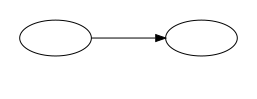

In [27]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="line") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","ノード")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","ノード")
    dot.edge("x1", "y1", label="エッジ")
#print(dot)
dot

### 問1. 太郎くんはスーパーで一個１００円のりんごを２個買いました。支払う金額を求めなさい。ただし、消費税が10%適用されるものとします。

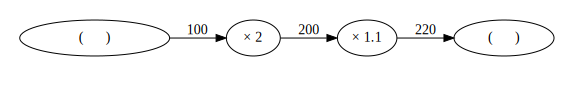

In [25]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="line") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="エッジを計算結果、ノードを計算式とした計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","りんご単価(入力)")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","× 2")
    with main.subgraph(name="cluster_y") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","× 1.1")    
    with main.subgraph(name="cluster_y") as out:
        out.attr(label="")
        out.attr(color="white")
        out.node("out1","金額(出力)")
    dot.edge("x1", "y1", label="100")
    dot.edge("y1", "z1", label="200")
    dot.edge("z1", "out1", label="220")
#print(dot)
dot

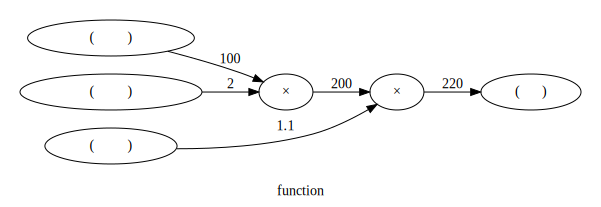

In [26]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="ノードをfunctionとした計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","りんご単価(スカラ)")
        x.node("x2","リンゴの個数(スカラ)")
        x.node("x3","消費税(スカラ)")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","×")
    with main.subgraph(name="cluster_y") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","×")    
    with main.subgraph(name="cluster_y") as out:
        out.attr(label="")
        out.attr(color="white")
        out.node("out1","金額(出力)")
    dot.edge("x1", "y1", label="100")
    dot.edge("x2", "y1", label="2")
    dot.edge("x3", "z1", label="1.1")
    dot.edge("y1", "z1", label="200")
    dot.edge("z1", "out1", label="220")
#print(dot)
dot

### 問2. 太郎くんはスーパーで一個１００円のりんごを２個、1個150円のみかんを3個買いました。支払う金額を求めなさい。ただし、消費税が10%適用されるものとします。

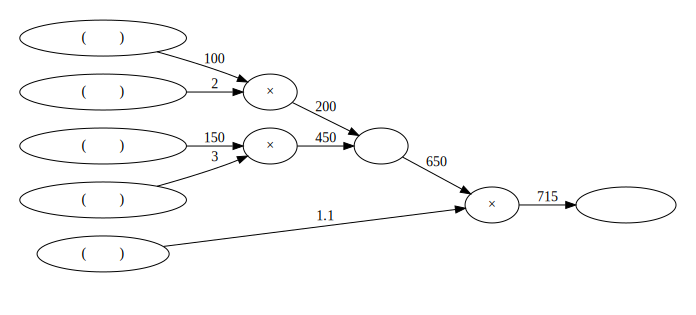

In [27]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="積算ノードと加算ノードをあわせた計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","リンゴ単価(スカラ)")
        x.node("x2","リンゴ個数(スカラ)")
        x.node("x3","みかん単価(スカラ)")
        x.node("x4","みかん個数(スカラ)")
        x.node("x5","消費税(スカラ)")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","×")
        y.node("y2","×")
    with main.subgraph(name="cluster_z") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","＋")
    with main.subgraph(name="cluster_a") as a:
        a.attr(label="")
        a.attr(color="white")
        a.node("a1","×")
    with main.subgraph(name="cluster_out") as out:
        out.attr(label="")
        out.attr(color="white")
        out.node("out1","金額（出力）")
    dot.edge("x1", "y1", label="100")
    dot.edge("x2", "y1", label="2")
    dot.edge("x3", "y2", label="150")
    dot.edge("x4", "y2", label="3")
    dot.edge("y1", "z1", label="200")
    dot.edge("y2", "z1", label="450")
    dot.edge("z1", "a1", label="650")
    dot.edge("x5", "a1", label="1.1")
    dot.edge("a1", "out1", label="715")
#print(dot)
dot

## 局所的な計算

一部のみを抜粋しても計算が可能であるということが、一つの計算ノードの再利用可能性を示している。

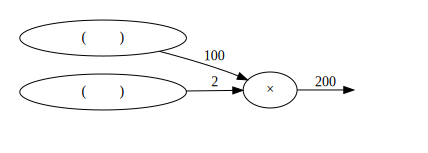

In [14]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="積算ノードと加算ノードをあわせた計算グラフ（局地的な計算）")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","リンゴ単価(スカラ)")
        x.node("x2","リンゴ個数(スカラ)")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","×")
    with main.subgraph(name="cluster_z") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","", color="white")
    dot.edge("x1", "y1", label="100")
    dot.edge("x2", "y1", label="2")
    dot.edge("y1", "z1", label="200")
#print(dot)
dot

### 逆伝搬の例

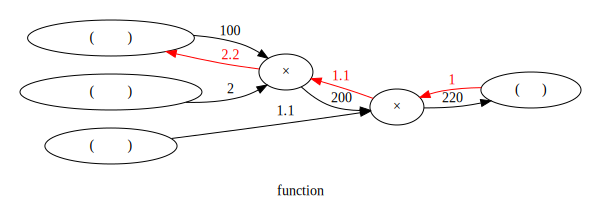

In [2]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="ノードをfunctionとした計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","りんご単価(スカラ)")
        x.node("x2","リンゴの個数(スカラ)")
        x.node("x3","消費税(スカラ)")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","×")
    with main.subgraph(name="cluster_y") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","×")    
    with main.subgraph(name="cluster_y") as out:
        out.attr(label="")
        out.attr(color="white")
        out.node("out1","金額(出力)")
    #Forward propagation
    dot.edge("x1", "y1", label="100")
    dot.edge("x2", "y1", label="2")
    dot.edge("x3", "z1", label="1.1")
    dot.edge("y1", "z1", label="200")
    dot.edge("z1", "out1", label="220")
    
    #Back propagation
    dot.edge("out1", "z1", label="1", color="red", fontcolor="red")
    dot.edge("z1", "y1", label="1.1", color="red", fontcolor="red")
    dot.edge("y1", "x1", label="2.2", color="red", fontcolor="red")
    
#print(dot)
dot

りんごが「１」微動した場合の価格の微動は「2.2」であることが示されている。

# 連鎖律

## 計算グラフの逆伝搬

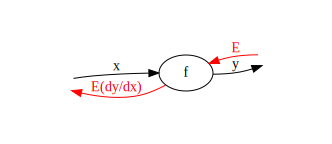

In [1]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="line") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="計算グラフの逆伝搬")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","", color="white")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","f")
    with main.subgraph(name="cluster_y") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","", color="white")
    dot.edge("x1", "y1", label="x")
    dot.edge("y1", "z1", label="y")
    dot.edge("z1", "y1", label="E", color="red", fontcolor="red")
    dot.edge("y1", "x1", label="E(dy/dx)", color="red", fontcolor="red")
#print(dot)
dot

- $x$: 下流から得たスカラ値
- $y$: $f(x)$
- $E$: 上流から得たスカラ値
- $dy/dx$: 関数fの導関数

## 連鎖律とは

ある関数が合成関数で表すことができる場合、その__合成関数の微分は、合成関数を構成するそれぞれの関数の微分の積によって表すことができる。__これを__連鎖律の原理__と呼ぶ。各ノードの微分式が逆伝搬の際に元の式の有効性を保ちつつそのまま伝達できることを示している。

### $ y = (x+y)^2 $の微分の例

$ y = (x+y)^2 $は以下のような変数 $z$ と $t$ によって表せる。  
  
式1. $ z = t^2 $  
式2. $ t = x + y $  
  

式1,式2を合成関数と呼ぶ。  

$ y = (x+y)^2 $ の導関数は$ \frac{\partial y}{\partial x} $  
$ z = t^2 $ の導関数は$ \frac{\partial z}{\partial t} $  

であるので、連鎖律によりこの合成関数の導関数は  

$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} $
となる。  
  
$\partial t$は積算で互いに打ち消し合い、最終的に元の式の導関数に戻ることを確認する。


### 合成関数の微分の計算

$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} $ を計算する。  
  
- $ \frac{\partial z}{\partial t} = 2t $ (通常の解析微分)
- $ \frac{\partial t}{\partial x} = 1$

$t$を展開すると <font color="red">$ 2 (x + y) $</font>。この結果は$ y = (x+y)^2 $ の導関数: $ \frac{\partial y}{\partial x} $と一致することを確認する。  

### $ y = (x+y)^2 $を計算グラフで示す

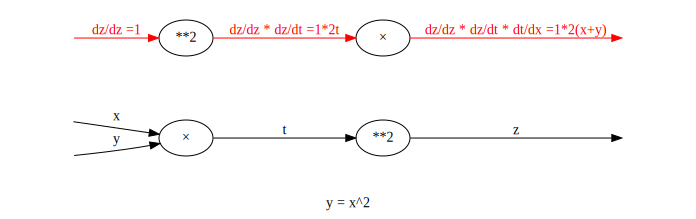

In [54]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(ranksep="1.2")
dot.attr(nodesep=".05")
#dot.attr(margin="1")
#dot.attr(splines="polyline") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="y = x^2の計算グラフと逆伝搬計算グラフ（赤字）")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("main.L1N1", "", color="white")
        L1.node("main.L1N2", "", color="white")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("main.L2N1","×")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("main.L3N1", "**2")
    with main.subgraph(name="cluster_a") as L4:
        L4.attr(label="")
        L4.attr(color="white")
        L4.node("main.L4N1", "", color="white")
    #Forward Propagation
    dot.edge("main.L1N1", "main.L2N1", label="x")
    dot.edge("main.L1N2", "main.L2N1", label="y")
    dot.edge("main.L2N1", "main.L3N1", label="t")
    dot.edge("main.L3N1", "main.L4N1", label="z")
with dot.subgraph(name="sub") as sub:
    with sub.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("sub.L1N1", "", color="white")
        L1.node("sub.L1N2", "", color="white")
    with sub.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("sub.L2N1","×")
    with sub.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("sub.L3N1", "**2")
    with sub.subgraph(name="cluster_a") as L4:
        L4.attr(label="")
        L4.attr(color="white")
        L4.node("sub.L4N1", "", color="white")
    #Back Propagation
    dot.edge("sub.L4N1", "sub.L3N1", label="dz/dz =1", color="red", fontcolor="red")
    dot.edge("sub.L3N1", "sub.L2N1", label="dz/dz * dz/dt =1*2t", color="red", fontcolor="red")
    dot.edge("sub.L2N1", "sub.L1N1", label="dz/dz * dz/dt * dt/dx =1*2(x+y)", color="red", fontcolor="red")
    #dot.edge("L2N1", "L1N2", label="", color="red", fontcolor="red")
#print(dot)
dot

## あらゆる式は2入力1出力の計算グラフに直すことが出来る

### 例
$f(x,y,z) = 2x + 3y * 4z$

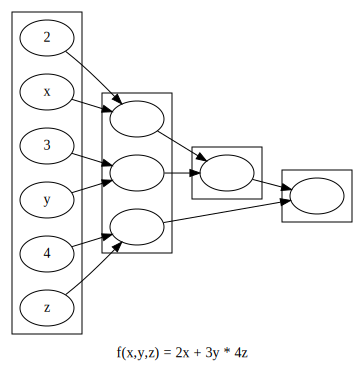

In [2]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="f(x,y,z) = 2x + 3y * 4zの計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.node("L1N1", "2")
        L1.node("L1N2", "x")
        L1.node("L1N3", "3")
        L1.node("L1N4", "y")
        L1.node("L1N5", "4")
        L1.node("L1N6", "z")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.node("L2N1","＊")
        L2.node("L2N2","＊")
        L2.node("L2N3","＊")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.node("L3N1", "＋")
    with main.subgraph(name="cluster_L4") as L4:
        L4.attr(label="")
        L4.node("L4N1", "＊")
    dot.edge("L1N1", "L2N1", label="")
    dot.edge("L1N2", "L2N1", label="")
    dot.edge("L1N3", "L2N2", label="")
    dot.edge("L1N4", "L2N2", label="")
    dot.edge("L1N5", "L2N3", label="")
    dot.edge("L1N6", "L2N3", label="")
    
    dot.edge("L2N1", "L3N1", label="")
    dot.edge("L2N2", "L3N1", label="")

    dot.edge("L3N1", "L4N1", label="")
    dot.edge("L2N3", "L4N1", label="")

    #print(dot)
dot

片方の成分での微分を（双方に対する誤差として）逆伝搬させることで、__より誤差を大きく出した片方に責任を負わせることが可能となる__ことが分かる。
これが計算グラフによって示されている。

## 加算ノードの逆伝搬

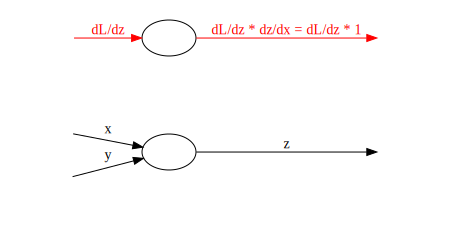

In [40]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="加算ノード計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("main.L1N1", "", color="white")
        L1.node("main.L1N2", "", color="white")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("main.L2N1","＋")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("main.L3N1", "", color="white")
    #Forward Propagation
    dot.edge("main.L1N1", "main.L2N1", label="x")
    dot.edge("main.L1N2", "main.L2N1", label="y")
    dot.edge("main.L2N1", "main.L3N1", label="z")
with dot.subgraph(name="sub") as sub:
    with sub.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("sub.L1N1", "", color="white")
        L1.node("sub.L1N2", "", color="white")
    with sub.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("sub.L2N1","＋")
    with sub.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("sub.L3N1", "", color="white")
    #Back Propagation
    dot.edge("sub.L3N1", "sub.L2N1", label="dL/dz", color="red", fontcolor="red")
    dot.edge("sub.L2N1", "sub.L1N1", label="dL/dz * dz/dx = dL/dz * 1", color="red", fontcolor="red")
#print(dot)
dot

In [44]:
class AddLayer:
    """
    加算ノード
    """
    def __init__(self):
        pass

    def forward(self, x, y):
        """
        順伝播
        """
        out = x + y
        return out

    def backward(self, dout):
        """
        逆伝播：微分
        """
        dx = dout * 1
        dy = dout * 1
        return dx, dy


- $z = x + y$  
    - $ \frac{\partial z}{\partial x} = 1$
    - $ \frac{\partial z}{\partial y} = 1$
  
よって、加算ノードの微分逆伝搬は上流からの伝搬$L$をそのまま下流に伝達させるのみ。

## 乗算ノードの逆伝搬

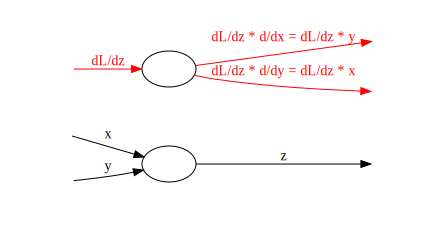

In [46]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="乗算ノード計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("main.L1N1", "", color="white")
        L1.node("main.L1N2", "", color="white")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("main.L2N1","＊")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("main.L3N1", "", color="white")
    #Forward Propagation
    dot.edge("main.L1N1", "main.L2N1", label="x")
    dot.edge("main.L1N2", "main.L2N1", label="y")
    dot.edge("main.L2N1", "main.L3N1", label="z")
with dot.subgraph(name="sub") as sub:
    with sub.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("sub.L1N1", "", color="white")
        L1.node("sub.L1N2", "", color="white")
    with sub.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("sub.L2N1","＊")
    with sub.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("sub.L3N1", "", color="white")
    #Back Propagation
    dot.edge("sub.L3N1", "sub.L2N1", label="dL/dz", color="red", fontcolor="red")
    dot.edge("sub.L2N1", "sub.L1N1", label="dL/dz * d/dx = dL/dz * y", color="red", fontcolor="red")
    dot.edge("sub.L2N1", "sub.L1N2", label="dL/dz * d/dy = dL/dz * x", color="red", fontcolor="red")
#print(dot)
dot

In [43]:
class MulLayer:
    """
    乗算ノード
    """
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        """
        順伝播
        """
        self.x = x
        self.y = y                
        out = x * y
        return out

    def backward(self, dout):
        """
        逆伝播：微分
        """
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy


- $z = xy$  
    - $ \frac{\partial z}{\partial x} = y$
    - $ \frac{\partial z}{\partial y} = x$
よって、乗算ノードの微分逆伝搬は上流からの伝搬$L$を入力変数で微分して下流に伝達させる。（伝搬方向がひっくり返る）

## ReLUノード（ReLUレイヤ）

$
順伝播　f(x) = \left\{ \begin{array}{ll}
    x & (x \gt 0) \\
    0 & (x \le 0)
  \end{array} \right.
$　　　　　　　　
$
逆伝播　f'(x) = \left\{ \begin{array}{ll}
    1 & (x \gt 0) \\
    0 & (x \le 0)
  \end{array} \right.
$　　　　　　　　

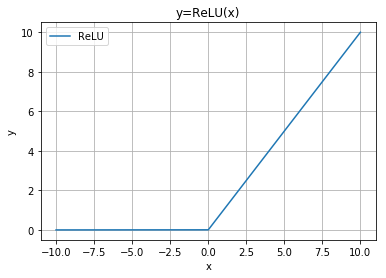

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-10,10,0.001) #-0 to 10 by 0.001
y = x * (x > 0)
plt.plot(x,y,label="ReLU", linestyle="-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=ReLU(x)")
plt.legend()
plt.grid()
plt.show()
plt.close()

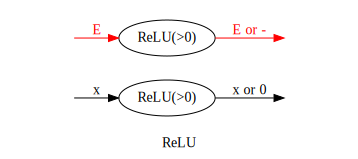

In [52]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="ReLUノード計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("main.L1N1", "", color="white")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("main.L2N1","ReLU(>0)")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("main.L3N1", "", color="white")
    #Forward Propagation
    dot.edge("main.L1N1", "main.L2N1", label="x")
    dot.edge("main.L2N1", "main.L3N1", label="x or 0")
with dot.subgraph(name="sub") as sub:
    with sub.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("sub.L1N1", "", color="white")
    with sub.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("sub.L2N1","ReLU(>0)")
    with sub.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("sub.L3N1", "", color="white")
    #Back Propagation
    dot.edge("sub.L3N1", "sub.L2N1", label="E", color="red", fontcolor="red")
    dot.edge("sub.L2N1", "sub.L1N1", label="E or -", color="red", fontcolor="red")
dot

#### ReLUノードにおける逆伝搬をすることで「発火しなかった細胞はそこで伝搬をストップする」という作用を与えることが可能

In [13]:
class Relu:
    """
    ReLUの実装
    """
    def __init__(self):
        self.mask = None

    def forward(self, x):
        """
        type x: numpy.array
        """
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        """
        type dout: numpy.array
        """
        dout[self.mask] = 0
        dx = dout
        return dx

## Sigmoidノード（Sigmoidレイヤ）

$順伝播　f(x) = \frac{1}{1 + e^(-x)}$　　　　　　　　$逆伝播 f'(x) = f(x)(1-f(x))$　　　　→　　$1 \ge f(x),f'(x) \ge 0$

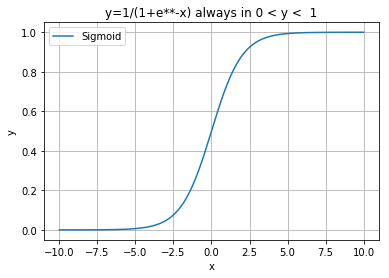

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-10,10,0.001) #-0 to 10 by 0.001
y = 1.0/(1.0 + np.e ** (-1.0*x))
plt.plot(x,y,label="Sigmoid", linestyle="-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=1/(1+e**-x) always in 0 < y <  1")
plt.legend()#show label box
plt.grid()
plt.show()
plt.close()

In [25]:
from common.functions import sigmoid

class Sigmoid:
    """
    シグモイド関数の実装
    """
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

## Affineノード（Affineレイヤ）

行列の内積を求めることを幾何学の分野でアフィン変換と呼ぶ。  
スカラが複数同時に行列として計算できるということが以下に示される。  
ただし、行列の次元数は合わせる必要がある。

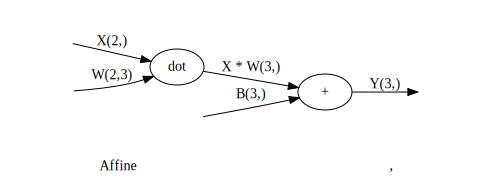

In [7]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="Affine変換とバイアス加算の計算グラフ※括弧内は（行数, 列数）")
with dot.subgraph(name="main") as main:
    main.attr(color="white")
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.node("L1N1", "", color="white")
        L1.node("L1N2", "", color="white")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.node("L2N1", "dot")
        L2.node("L2N2", "", color="white")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.node("L3N1", "+")
    with main.subgraph(name="cluster_L4") as L4:
        L4.attr(label="")
        L4.node("L4N1", "", color="white")
    dot.edge("L1N1", "L2N1", label="X(2,)")
    dot.edge("L1N2", "L2N1", label="W(2,3)")
    dot.edge("L2N1", "L3N1", label="X * W(3,)")
    dot.edge("L2N2", "L3N1", label="B(3,)")
    dot.edge("L3N1", "L4N1", label="Y(3,)")
dot

#### Affine変換は単純にこれまでの算術ノードの計算を一つ一つの行列の要素毎に実行しているにすぎない

In [1]:
class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx

## SoftMax-WithLossノード（Softmaxレイヤ）

複数のスコアが適用された出力を正規化し、後のレイヤにおいてそのデータを正規的に使用する際に必要なノード。損失関数として、クロスエントロピー誤差計算関数を使っているので-WithLossというサフィックスが付いている。正規化が必要ない（スコアのたった一つの最頻値や最大値・最小値・平均値を使うような機械学習）の場合はこのノードは必要なし。ディープラーニングの際はスコアをそのまま入力として使うことをせず、一度確率的な数値(1>$p_n(\sum{p_n}==1)$>0)に直してから使用するためこのノードが必要となるケースがある。__出力層で使われる際、もし分類問題の場合は入力データの数==出力データの数==分類数となっている必要がある。__

In [10]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

In [8]:
softmax(np.array([[0,1],[2,3]]))

array([[ 0.26894142,  0.73105858],
       [ 0.26894142,  0.73105858]])

In [9]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

## 誤差逆伝搬法

### ニューラルネットワークの学習ステップ

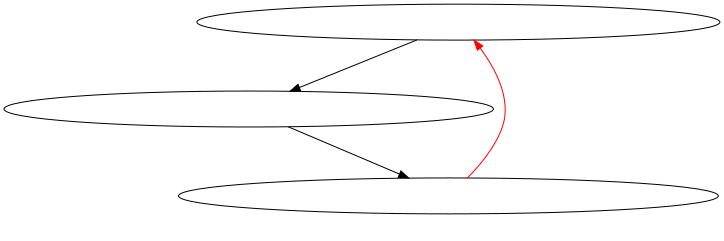

In [6]:
from graphviz import Digraph
dot = Digraph(comment="学習ステップ")
dot.attr(rankdir="UD")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="学習ステップ")
with dot.subgraph(name="main") as main:
    dot.node("MiniBatch","ミニバッチ：訓練データの中からランダムに一部のデータを選び出す")
    dot.node("CalcGrad","勾配の算出：各重みパラメータに関する損失関数の勾配を求める")
    dot.node("ReParam","パラメータの更新：重みパラメータを勾配方向に微小量だけ更新する。")
    dot.edge("MiniBatch", "CalcGrad", label="サンプリング")
    dot.edge("CalcGrad", "ReParam", label="反映")
    dot.edge("ReParam", "MiniBatch", label="繰り返し",color="red")
dot

## TwoLayerNet （誤差逆伝搬法（非：数値微分法）を追加バージョン）の実装

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:
    """
    このクラス自身は特に処理をしません。
    """
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        """
        各種レイヤを作成し、レイヤのハイパーパラメータを初期化します。
        ガウス分布などの分布の適合線に関する情報: https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/graphs/supporting-topics/exploring-data-and-revising-graphs/distributions-for-fitted-lines/ 
        分布のスケールパラメータに関する情報： https://en.wikipedia.org/wiki/Scale_parameter
        Args:
            input_size (int): 入力層のニューロン数（入力データ要素数）
            hidden_size (int): 隠れ層のニューロン数
            output_size (int): 出力層のニューロン数（出力データ要素数）
            weight_init_std (int): 重み初期化時のガウス分布（正規分布）のスケールパラメタ＝分布の幅
        Returns:
            None
        """
        self.params = {}
        #randnで"正規分布"でランダムな行列（input_size列、hidden_size行）を生成し
        #それをweight_init_stdのスケールに狭めて重みデータの初期値を決める
        #バイアスはhidden_size行数だけ必要になるのでゼロで初期化
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        #隠れ層についても同様に実施
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        #それらの重み・バイアスの変数を持った各々の各レイヤを作成。
        self.layers = OrderedDict()
        #Affine1→Relu1→Affine2
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        #出力層（誤差計算層）を初期化
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        """
        OrderedDictを順番に取り出し順伝搬させる
        各レイヤの持っている重みとバイアスが使われる。
        Args:
            x (int): 計算対象の行列（入力行列）
        Returns:
            x (int): 計算結果（出力行列）
        """
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        """
        OrderedDictを順番に取り出し順伝搬させた後
        学習データと教師データを
        Args:
            x (int): 入力データ
            t (int): 教師データ
        Returns:
            x (int): 出力データ
        """
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        """
        Args:
            x (int): 入力データ
            t (int): 教師データ
        Returns:
            accuracy (float): 認識精度
        """
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        """
        Args:
            x (int): 入力データ
            t (int): 教師データ
        Returns:
            grads (dict): 数理的微分法を用いて計算された傾き及びバイアス
        """
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        """
        Args:
            x (int): 入力データ
            t (int): 教師データ
        Returns:
            grads (dict): 解析的微分法を用いて計算された傾き及びバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

### 誤差逆伝搬法の微分方式の内、解析的微分法の勾配が正しく計算されていることを確認するには数値的微分法の計算結果と照らし合わせると良い。

## 誤差逆伝播法の学習

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み ★学習データとテストデータは同じものを使ってはならない
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#784個の入力データ：縦28画素*横28画素
#50個の想定される構成因子数
#10個の出力データ：0～9の数字
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000 #学習回数
train_size = x_train.shape[0] #学習データ数
batch_size = 100 #バッチサイズ（100個サンプリングして学習）
learning_rate = 0.1 #学習率

train_loss_list = [] #途中経過保存用
train_acc_list = [] #途中経過保存用
test_acc_list = [] #途中経過保存用

iter_per_epoch = max(train_size / batch_size, 1) #バッチ回数

print("学習回数：", iters_num, "学習データ数：", train_size, "バッチサイズ：", batch_size, "学習率：", learning_rate)

for i in range(iters_num):
    #学習データからバッチ用のデータをランダムに抽出（一様分布）
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        # 差分 * 学習率 を減算し、ニューラルネットワークの重みとバイアスの値を更新
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #以下、経過出力用コード
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("★%d個サンプル学習データを%d回学習★" % (batch_size, i), "学習率：", train_acc, "認識率：", test_acc, "勾配差分：", loss)

/home/nbuser/library/dataset
/home/nbuser/library/dataset/mnist.pkl
学習回数： 10000 学習データ数： 60000 バッチサイズ： 100 学習率： 0.1
★100個サンプル学習データを0回学習★ 学習率： 0.09715 認識率： 0.0949 勾配差分： 2.29945818197
★100個サンプル学習データを600回学習★ 学習率： 0.90625 認識率： 0.908 勾配差分： 0.439783009204
★100個サンプル学習データを1200回学習★ 学習率： 0.92255 認識率： 0.9231 勾配差分： 0.289490517334
★100個サンプル学習データを1800回学習★ 学習率： 0.9352 認識率： 0.936 勾配差分： 0.164406081057
★100個サンプル学習データを2400回学習★ 学習率： 0.944316666667 認識率： 0.9438 勾配差分： 0.15331866909
★100個サンプル学習データを3000回学習★ 学習率： 0.95115 認識率： 0.9473 勾配差分： 0.184521064114
★100個サンプル学習データを3600回学習★ 学習率： 0.95625 認識率： 0.9514 勾配差分： 0.147827262921
★100個サンプル学習データを4200回学習★ 学習率： 0.959083333333 認識率： 0.9544 勾配差分： 0.132407806745
★100個サンプル学習データを4800回学習★ 学習率： 0.96295 認識率： 0.9568 勾配差分： 0.0582601241443
★100個サンプル学習データを5400回学習★ 学習率： 0.967866666667 認識率： 0.9601 勾配差分： 0.112774200588
★100個サンプル学習データを6000回学習★ 学習率： 0.970266666667 認識率： 0.9625 勾配差分： 0.0601243286545
★100個サンプル学習データを6600回学習★ 学習率： 0.971183333333 認識率： 0.9624 勾配差分： 0.0645355518872
★100個サンプル学習データを7